In [1]:
import torch
from gconv_standalone import GConv
import matplotlib.pyplot as plt

In [2]:
layer = GConv(
    d_model=256,
    d_state=64,
    l_max=1_000_000,
    bidirectional=True,
    kernel_dim=32,
    n_scales=None,
    decay_min=2,
    decay_max=2,
)

In [3]:
x = torch.randn(1, 256, 1_000_000)
x = x.cuda()
layer.cuda()
y, k = layer(x, return_kernel=True)

Kernel norm: 219504.359375
Kernel size: torch.Size([2, 256, 1048576])


In [4]:
print(f"GPU memory allocated: {torch.cuda.memory_allocated() / 1e9} GB")
print(f"GPU memory cached: {torch.cuda.memory_cached() / 1e9} GB")

GPU memory allocated: 8.196085248 GB
GPU memory cached: 21.825060864 GB


/data/tianle/anaconda3/lib/python3.9/site-packages/torch/cuda/memory.py:391: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [5]:
k.shape

torch.Size([1, 256, 2000000])

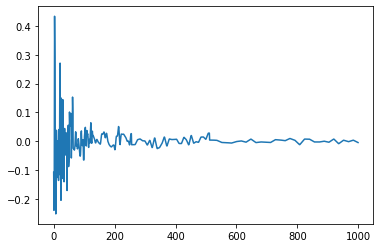

In [6]:
plt.plot(k[0, 0, :1_000].detach().cpu().numpy())

In [7]:
layer_slow = GConv(
    d_model=256,
    d_state=64,
    l_max=1_000_000,
    bidirectional=True,
    kernel_dim=32,
    n_scales=None,
    decay_min=1.1,
    decay_max=1.1,
)

In [8]:
layer_slow.cuda()
y_slow, k_slow = layer_slow(x, return_kernel=True)

Kernel norm: 951.2708740234375
Kernel size: torch.Size([2, 256, 1048576])


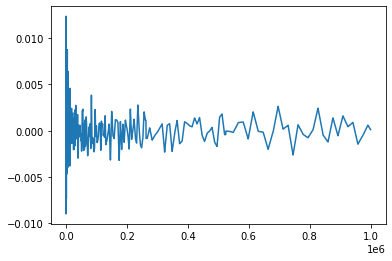

In [9]:
plt.plot(k_slow[0, 0, :1_000_000].detach().cpu().numpy())